In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

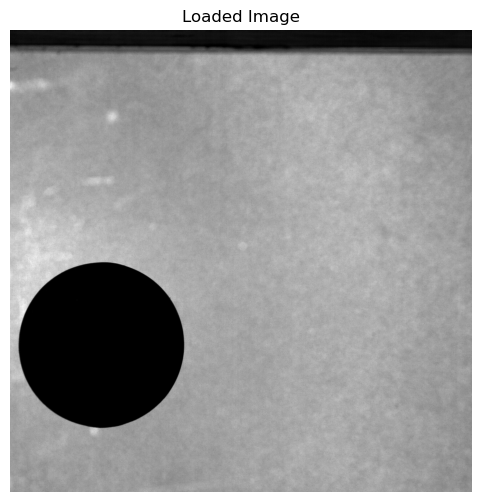

In [3]:
from PIL import Image
# Load the TIFF image
file_path = r"H:\FST_809_FF_Sphere\FST_809_FF_Sphere_C001H001S0001\FST_809_FF_Sphere_C001H001S0001000139.tif"

try:
    image = Image.open(file_path)
    image_array = np.array(image)

    # Display the first frame for inspection
    plt.figure(figsize=(6, 6))
    plt.imshow(image_array, cmap='gray')
    plt.title("Loaded Image")
    plt.axis("off")
    plt.show()

    # Check image properties
    image_array.shape, image_array.dtype

except Exception as e:
    str(e)


Detected Circle: Center (739, 727), Radius 183


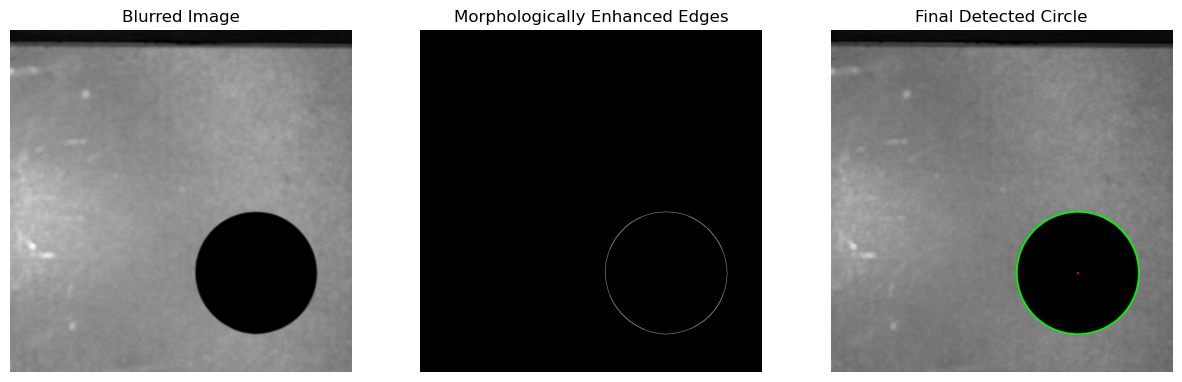

In [6]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the TIFF image using PIL
file_path = r"H:\FST_809_FF_Sphere\FST_809_FF_Sphere_C001H001S0001\FST_809_FF_Sphere_C001H001S0001000300.tif"

try:
    image = Image.open(file_path)
    image_array = np.array(image)  # Convert to NumPy array

    # Convert to 8-bit grayscale if necessary
    if image_array.dtype == np.uint16:
        image_array = (image_array / 16).astype(np.uint8)  # Scale from 12-bit/16-bit to 8-bit

    # Apply Gaussian blur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(image_array, (9, 9), 0)

    # Apply Canny edge detection with adjusted thresholds
    edges = cv2.Canny(blurred, 80, 200)

    # Apply morphological closing to enhance circular edges
    kernel = np.ones((5, 5), np.uint8)
    closed_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Apply Hough Circle Transform with optimized parameters
    detected_circles = cv2.HoughCircles(
        closed_edges,
        cv2.HOUGH_GRADIENT,
        dp=1.2,
        minDist=50,
        param1=80,  # Edge detection threshold
        param2=40,  # Accumulator threshold for circle detection
        minRadius=50,  # Ignore small false detections
        maxRadius=300,  # Ensure large circle detection
    )

    # Convert grayscale to RGB for visualization
    output = cv2.cvtColor(image_array, cv2.COLOR_GRAY2BGR)

    # Draw detected circles
    if detected_circles is not None:
        detected_circles = np.uint16(np.around(detected_circles))
        for pt in detected_circles[0, :]:
            a, b, r = pt
            cv2.circle(output, (a, b), r, (0, 255, 0), 3)  # Draw circle
            cv2.circle(output, (a, b), 2, (0, 0, 255), 3)  # Draw center

        print(f"Detected Circle: Center ({a}, {b}), Radius {r}")

    else:
        print("No circles detected.")

    # Display results
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(blurred, cmap='gray')
    ax[0].set_title("Blurred Image")
    ax[0].axis("off")

    ax[1].imshow(closed_edges, cmap='gray')
    ax[1].set_title("Morphologically Enhanced Edges")
    ax[1].axis("off")

    ax[2].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    ax[2].set_title("Final Detected Circle")
    ax[2].axis("off")

    plt.show()

except Exception as e:
    print("Error:", str(e))




Trajectory Data Saved:
   Image_Number  Centre_X  Centre_Y  Radius
0            72         7       683     180
1            76        19       685     178
2            80        31       685     179
3            86        43       679     173
4            87        49       685     180


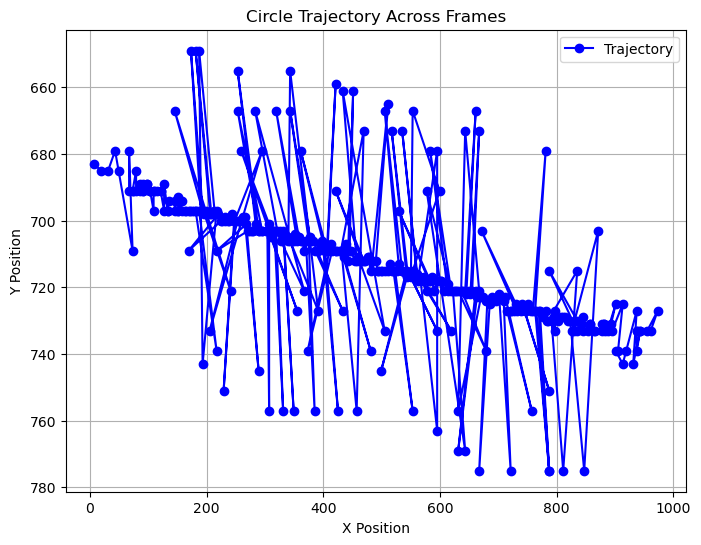


CSV file saved at: H:\FST_809_FF_Sphere\FST_809_FF_Sphere_C001H001S0001\circle_trajectory.csv


In [2]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd

# Folder containing TIFF images
folder_path = r"H:\FST_809_FF_Sphere\FST_809_FF_Sphere_C001H001S0001"

# Get all TIFF images in the folder
image_files = sorted(glob.glob(os.path.join(folder_path, "*.tif")))

# Initialize lists for tracking trajectory data
image_numbers = []
trajectory_x = []
trajectory_y = []
radii = []

# Process each image in the folder
for idx, file_path in enumerate(image_files, start=1):
    try:
        # Load the image using PIL
        image = Image.open(file_path)
        image_array = np.array(image)  # Convert to NumPy array

        # Convert to 8-bit grayscale if necessary
        if image_array.dtype == np.uint16:
            image_array = (image_array / 16).astype(np.uint8)  # Scale from 12-bit/16-bit to 8-bit

        # Apply Gaussian blur to reduce noise
        blurred = cv2.GaussianBlur(image_array, (9, 9), 0)

        # Apply Canny edge detection
        edges = cv2.Canny(blurred, 80, 200)

        # Apply morphological closing
        kernel = np.ones((5, 5), np.uint8)
        closed_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

        # Apply Hough Circle Transform
        detected_circles = cv2.HoughCircles(
            closed_edges,
            cv2.HOUGH_GRADIENT,
            dp=1.2,
            minDist=50,
            param1=80,
            param2=40,
            minRadius=50,
            maxRadius=300,
        )

        # Convert grayscale to RGB for visualization
        output = cv2.cvtColor(image_array, cv2.COLOR_GRAY2BGR)

        if detected_circles is not None:
            detected_circles = np.uint16(np.around(detected_circles))
            for pt in detected_circles[0, :]:
                a, b, r = pt
                cv2.circle(output, (a, b), r, (0, 255, 0), 3)  # Draw circle
                cv2.circle(output, (a, b), 2, (0, 0, 255), 3)  # Draw center

                # Store trajectory data
                image_numbers.append(idx)
                trajectory_x.append(a)
                trajectory_y.append(b)
                radii.append(r)

                # print(f"Frame {idx}: Center ({a}, {b}), Radius {r}")

        # Optional: Display the detected circle
        # plt.figure(figsize=(6, 6))
        # plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
        # plt.title(f"Detected Circle - {os.path.basename(file_path)}")
        # plt.axis("off")
        # plt.show()

    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")

# Create a DataFrame to store trajectory data
trajectory_data = pd.DataFrame({
    "Image_Number": image_numbers,
    "Centre_X": trajectory_x,
    "Centre_Y": trajectory_y,
    "Radius": radii
})

# Save the DataFrame as a CSV file
csv_file_path = os.path.join(folder_path, "circle_trajectory.csv")
trajectory_data.to_csv(csv_file_path, index=False)

# Display the DataFrame
print("\nTrajectory Data Saved:")
print(trajectory_data.head())

# Plot the trajectory of the detected circle
plt.figure(figsize=(8, 6))
plt.plot(trajectory_data["Centre_X"], trajectory_data["Centre_Y"], marker='o', linestyle='-', color='b', label="Trajectory")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Circle Trajectory Across Frames")
plt.gca().invert_yaxis()  # Flip Y-axis to match image coordinates
plt.legend()
plt.grid()
plt.show()

print(f"\nCSV file saved at: {csv_file_path}")


In [4]:
trajectory_data.head()

,Image_Number,Centre_X,Centre_Y,Radius
0,72,7,683,180
1,76,19,685,178
2,80,31,685,179
3,86,43,679,173
4,87,49,685,180


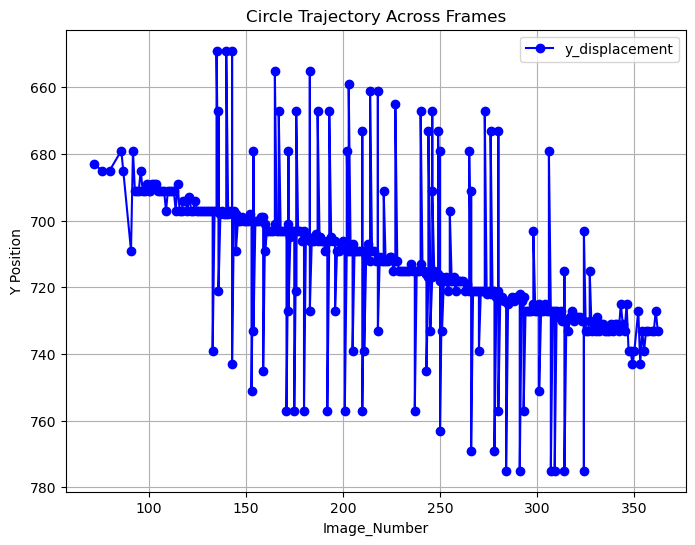

In [6]:
# Plot the trajectory of the detected circle
plt.figure(figsize=(8, 6))
plt.plot(trajectory_data["Image_Number"], trajectory_data["Centre_Y"], marker='o', linestyle='-', color='b', label="y_displacement")
plt.xlabel("Image_Number")
plt.ylabel("Y Position")
plt.title("Circle Trajectory Across Frames")
plt.gca().invert_yaxis()  # Flip Y-axis to match image coordinates
plt.legend()
plt.grid()
plt.show()

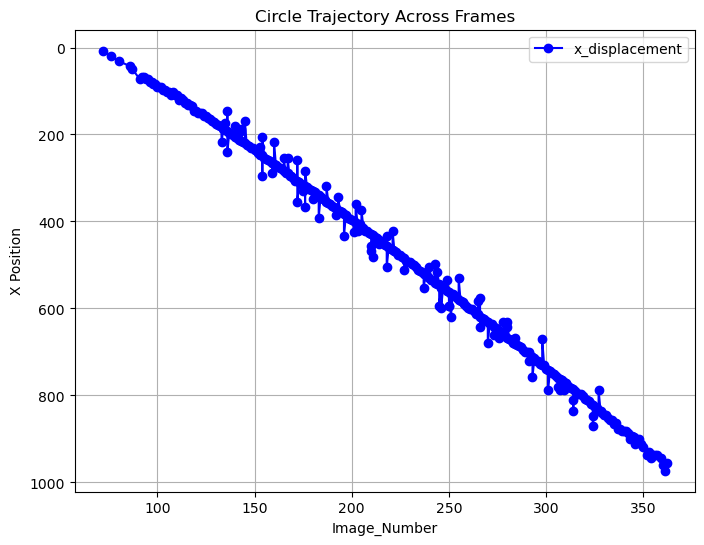

In [7]:
# Plot the trajectory of the detected circle
plt.figure(figsize=(8, 6))
plt.plot(trajectory_data["Image_Number"], trajectory_data["Centre_X"], marker='o', linestyle='-', color='b', label="x_displacement")
plt.xlabel("Image_Number")
plt.ylabel("X Position")
plt.title("Circle Trajectory Across Frames")
plt.gca().invert_yaxis()  # Flip Y-axis to match image coordinates
plt.legend()
plt.grid()
plt.show()

In [15]:
import cv2
import numpy as np
from PIL import Image
import os
import glob

# Folder containing original TIFF images
input_folder = r"H:\FST_809_FF_Sphere\FST_809_FF_Sphere_C001H001S0001"

# Folder to save realigned images
output_folder = r"H:\FST_809_FF_Sphere\Realigned_Images"
os.makedirs(output_folder, exist_ok=True)

# Get all TIFF images in the folder
image_files = sorted(glob.glob(os.path.join(input_folder, "*.tif")))

# Function to detect the black patch position
def detect_black_patch(image):
    """Detect the lowest Y-coordinate of the black patch at the top."""
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if len(image.shape) == 3 else image
    
    # Convert to 8-bit if necessary
    if gray.dtype == np.uint16:
        gray = (gray / 256).astype(np.uint8)

    # Apply thresholding to isolate black regions
    _, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)

    # Find contours of the black patch
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if contours:
        # Find the highest black region (assumed to be the patch)
        y_coords = [cv2.boundingRect(cnt)[1] for cnt in contours]
        return min(y_coords)  # Return lowest Y-coordinate of patch

    return None  # No patch found

# Load the first image and get reference patch position
first_image = np.array(Image.open(image_files[0]))
ref_patch_y = detect_black_patch(first_image)

if ref_patch_y is None:
    raise ValueError("Black patch not found in the first image. Please check the image.")

# Process each image in the folder
for idx, file_path in enumerate(image_files, start=1):
    try:
        # Load the image
        image = np.array(Image.open(file_path))

        # Detect the black patch position in the current image
        patch_y = detect_black_patch(image)

        if patch_y is not None:
            # Compute vertical shift
            shift_y = ref_patch_y - patch_y

            # Apply vertical translation to the entire image
            translation_matrix = np.float32([[1, 0, 0], [0, 1, shift_y]])
            realigned_image = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))

            # Save the realigned image in grayscale format
            output_path = os.path.join(output_folder, f"realigned_{idx:04d}.tif")
            cv2.imwrite(output_path, realigned_image)  # Correctly saves in grayscale
            print(f"Saved realigned grayscale image: {output_path}")

    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")


Saved realigned grayscale image: H:\FST_809_FF_Sphere\Realigned_Images\realigned_0001.tif
Saved realigned grayscale image: H:\FST_809_FF_Sphere\Realigned_Images\realigned_0002.tif
Saved realigned grayscale image: H:\FST_809_FF_Sphere\Realigned_Images\realigned_0003.tif
Saved realigned grayscale image: H:\FST_809_FF_Sphere\Realigned_Images\realigned_0004.tif
Saved realigned grayscale image: H:\FST_809_FF_Sphere\Realigned_Images\realigned_0005.tif
Saved realigned grayscale image: H:\FST_809_FF_Sphere\Realigned_Images\realigned_0006.tif
Saved realigned grayscale image: H:\FST_809_FF_Sphere\Realigned_Images\realigned_0007.tif
Saved realigned grayscale image: H:\FST_809_FF_Sphere\Realigned_Images\realigned_0008.tif
Saved realigned grayscale image: H:\FST_809_FF_Sphere\Realigned_Images\realigned_0009.tif
Saved realigned grayscale image: H:\FST_809_FF_Sphere\Realigned_Images\realigned_0010.tif
Saved realigned grayscale image: H:\FST_809_FF_Sphere\Realigned_Images\realigned_0011.tif
Saved real

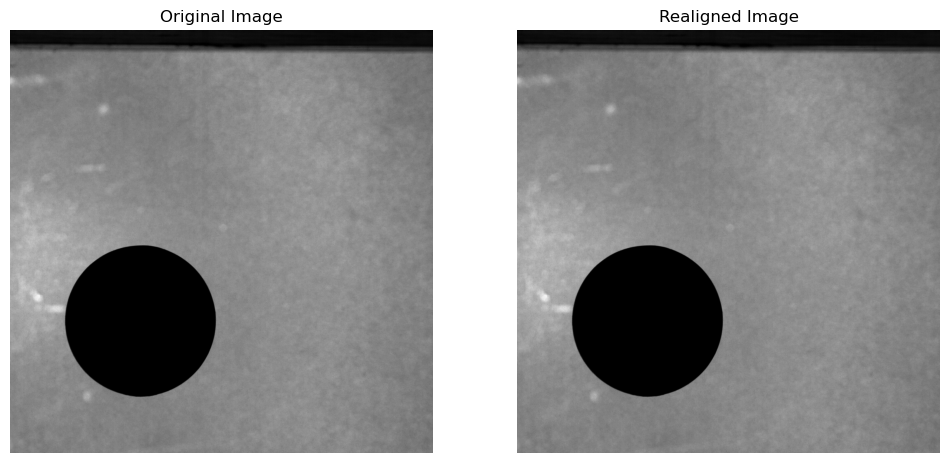

In [16]:
import tifffile
import matplotlib.pyplot as plt

# Load the realigned and original images
realigned_path = r"H:\FST_809_FF_Sphere\Realigned_Images/realigned_0175.tif"
original_path = r"H:\FST_809_FF_Sphere\FST_809_FF_Sphere_C001H001S0001\FST_809_FF_Sphere_C001H001S0001000175.tif"

realigned_image = tifffile.imread(realigned_path)
original_image = tifffile.imread(original_path)

# Display both images side by side for comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(original_image, cmap="gray")
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(realigned_image, cmap="gray")
ax[1].set_title("Realigned Image")
ax[1].axis("off")

plt.show()


Detected Circle: Center (739, 727), Radius 183


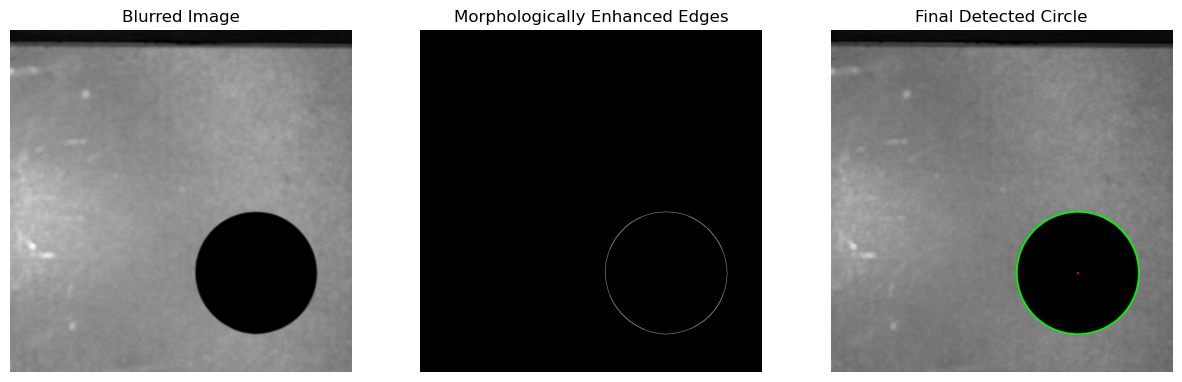

In [17]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the TIFF image using PIL
file_path = r"H:\FST_809_FF_Sphere\Realigned_Images\realigned_0300.tif"

try:
    image = Image.open(file_path)
    image_array = np.array(image)  # Convert to NumPy array

    # Convert to 8-bit grayscale if necessary
    if image_array.dtype == np.uint16:
        image_array = (image_array / 16).astype(np.uint8)  # Scale from 12-bit/16-bit to 8-bit

    # Apply Gaussian blur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(image_array, (9, 9), 0)

    # Apply Canny edge detection with adjusted thresholds
    edges = cv2.Canny(blurred, 80, 200)

    # Apply morphological closing to enhance circular edges
    kernel = np.ones((5, 5), np.uint8)
    closed_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Apply Hough Circle Transform with optimized parameters
    detected_circles = cv2.HoughCircles(
        closed_edges,
        cv2.HOUGH_GRADIENT,
        dp=1.2,
        minDist=50,
        param1=80,  # Edge detection threshold
        param2=40,  # Accumulator threshold for circle detection
        minRadius=50,  # Ignore small false detections
        maxRadius=300,  # Ensure large circle detection
    )

    # Convert grayscale to RGB for visualization
    output = cv2.cvtColor(image_array, cv2.COLOR_GRAY2BGR)

    # Draw detected circles
    if detected_circles is not None:
        detected_circles = np.uint16(np.around(detected_circles))
        for pt in detected_circles[0, :]:
            a, b, r = pt
            cv2.circle(output, (a, b), r, (0, 255, 0), 3)  # Draw circle
            cv2.circle(output, (a, b), 2, (0, 0, 255), 3)  # Draw center

        print(f"Detected Circle: Center ({a}, {b}), Radius {r}")

    else:
        print("No circles detected.")

    # Display results
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(blurred, cmap='gray')
    ax[0].set_title("Blurred Image")
    ax[0].axis("off")

    ax[1].imshow(closed_edges, cmap='gray')
    ax[1].set_title("Morphologically Enhanced Edges")
    ax[1].axis("off")

    ax[2].imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    ax[2].set_title("Final Detected Circle")
    ax[2].axis("off")

    plt.show()

except Exception as e:
    print("Error:", str(e))



In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd

# Folder containing realigned TIFF images
folder_path = r"H:\FST_809_FF_Sphere\Realigned_Images"

# Folder to save images with detected circles
output_folder = r"H:\FST_809_FF_Sphere\Detected_Circles"
os.makedirs(output_folder, exist_ok=True)

# Get all TIFF images in the folder
image_files = sorted(glob.glob(os.path.join(folder_path, "*.tif")))

# Initialize lists for tracking trajectory data
image_numbers = []
trajectory_x = []
trajectory_y = []
radii = []

# Process each image in the folder
for idx, file_path in enumerate(image_files, start=1):
    try:
        # Load the image using PIL
        image = Image.open(file_path)
        image_array = np.array(image)  # Convert to NumPy array

        # Convert to 8-bit grayscale if necessary
        if image_array.dtype == np.uint16:
            image_array = (image_array / 16).astype(np.uint8)  # Scale from 12-bit/16-bit to 8-bit

        # Apply Gaussian blur to reduce noise
        blurred = cv2.GaussianBlur(image_array, (9, 9), 0)

        # Apply Canny edge detection
        edges = cv2.Canny(blurred, 80, 200)

        # Apply morphological closing
        kernel = np.ones((5, 5), np.uint8)
        closed_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

        # Apply Hough Circle Transform
        detected_circles = cv2.HoughCircles(
            closed_edges,
            cv2.HOUGH_GRADIENT,
            dp=1.2,
            minDist=50,
            param1=80,
            param2=40,
            minRadius=50,
            maxRadius=300,
        )

        # Convert grayscale to RGB for visualization
        output = cv2.cvtColor(image_array, cv2.COLOR_GRAY2BGR)

        if detected_circles is not None:
            detected_circles = np.uint16(np.around(detected_circles))
            
            # Select the largest circle (based on radius)
            best_circle = max(detected_circles[0, :], key=lambda c: c[2])  # c[2] is radius
            
            a, b, r = best_circle  # Center (x, y) and radius
            cv2.circle(output, (a, b), r, (0, 255, 0), 3)  # Draw largest circle
            cv2.circle(output, (a, b), 2, (0, 0, 255), 3)  # Draw center

            # Store only the selected circle
            image_numbers.append(idx)
            trajectory_x.append(a)
            trajectory_y.append(b)
            radii.append(r)

        # Save the image with detected circles
        output_image_path = os.path.join(output_folder, f"detected_{idx:04d}.tif")
        cv2.imwrite(output_image_path, output)  # Save in grayscale format
        # print(f"Saved detected circle image: {output_image_path}")

    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")

# Create a DataFrame to store trajectory data
trajectory_data = pd.DataFrame({
    "Image_Number": image_numbers,
    "Centre_X": trajectory_x,
    "Centre_Y": trajectory_y,
    "Radius": radii
})


# Display the DataFrame
print("\nTrajectory Data Saved:")
print(trajectory_data.head())

# # Plot the trajectory of the detected circle
# plt.figure(figsize=(8, 6))
# plt.plot(trajectory_data["Centre_X"], trajectory_data["Centre_Y"], marker='o', linestyle='-', color='b', label="Trajectory")
# plt.xlabel("X Position")
# plt.ylabel("Y Position")
# plt.title("Circle Trajectory Across Frames")
# plt.gca().invert_yaxis()  # Flip Y-axis to match image coordinates
# plt.legend()
# plt.grid()
# plt.show()

# print(f"\nCSV file saved at: {csv_file_path}")
# print(f"Detected circles images saved in: {output_folder}")



Trajectory Data Saved:
   Image_Number  Centre_X  Centre_Y  Radius
0            72         7       683     180
1            76        19       685     178
2            80        31       685     179
3            86        43       679     173
4            87        49       685     180

CSV file saved at: H:\FST_809_FF_Sphere\Realigned_Images\realigned_circle_trajectory.csv
Detected circles images saved in: H:\FST_809_FF_Sphere\Detected_Circles


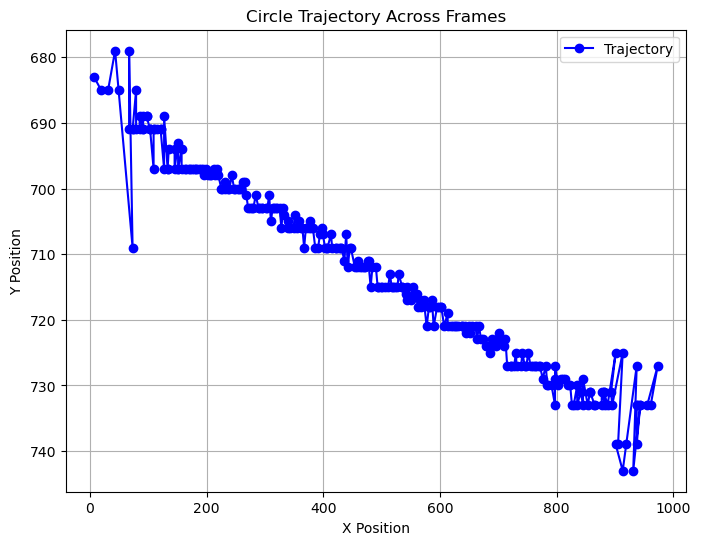

In [21]:
# Plot the trajectory of the detected circle
plt.figure(figsize=(8, 6))
plt.plot(trajectory_data["Centre_X"], trajectory_data["Centre_Y"], marker='o', linestyle='-', color='b', label="Trajectory")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Circle Trajectory Across Frames")
plt.gca().invert_yaxis()  # Flip Y-axis to match image coordinates
plt.legend()
plt.grid()
plt.show()

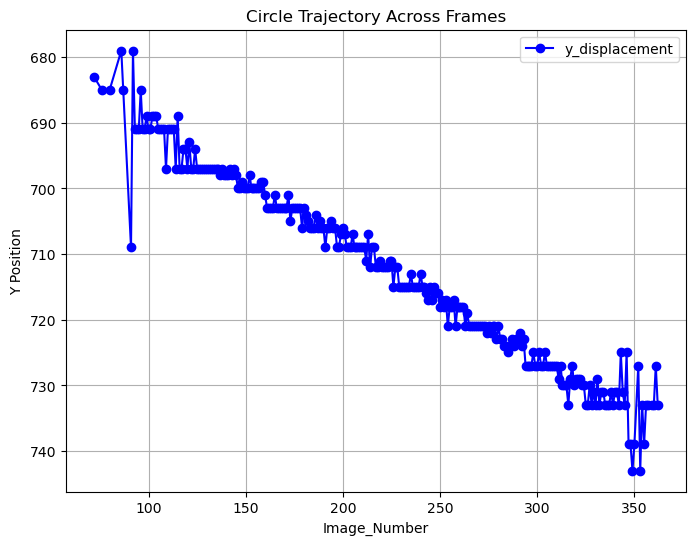

In [22]:
# Plot the trajectory of the detected circle
plt.figure(figsize=(8, 6))
plt.plot(trajectory_data["Image_Number"], trajectory_data["Centre_Y"], marker='o', linestyle='-', color='b', label="y_displacement")
plt.xlabel("Image_Number")
plt.ylabel("Y Position")
plt.title("Circle Trajectory Across Frames")
plt.gca().invert_yaxis()  # Flip Y-axis to match image coordinates
plt.legend()
plt.grid()
plt.show()

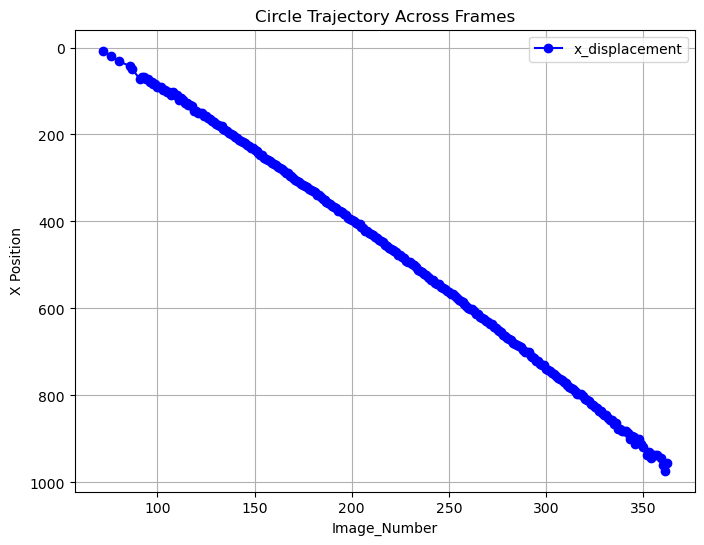

In [23]:
# Plot the trajectory of the detected circle
plt.figure(figsize=(8, 6))
plt.plot(trajectory_data["Image_Number"], trajectory_data["Centre_X"], marker='o', linestyle='-', color='b', label="x_displacement")
plt.xlabel("Image_Number")
plt.ylabel("X Position")
plt.title("Circle Trajectory Across Frames")
plt.gca().invert_yaxis()  # Flip Y-axis to match image coordinates
plt.legend()
plt.grid()
plt.show()

In [25]:
import pandas as pd
import numpy as np

# Extract relevant columns
t = trajectory_data["Image_Number"].values  # Frame numbers (time steps)
X = trajectory_data["Centre_X"].values  # X positions
Y = trajectory_data["Centre_Y"].values  # Y positions

# Sampling rate and time step in milliseconds
sampling_rate = 20000  # 20 kHz
dt = 1 / sampling_rate * 1000  # Convert to milliseconds (0.05 ms per frame)

# Compute actual time in milliseconds
Time_ms = np.arange(len(t)) * dt  # Generate time array

# Compute velocity using finite difference method
Vx = np.gradient(X, dt)  # dX/dt
Vy = np.gradient(Y, dt)  # dY/dt

# Compute acceleration using finite difference method
Ax = np.gradient(Vx, dt)  # dVx/dt
Ay = np.gradient(Vy, dt)  # dVy/dt

# Add computed values to DataFrame
trajectory_data["Time_ms"] = Time_ms  # Time in milliseconds
trajectory_data["Velocity_X"] = Vx
trajectory_data["Velocity_Y"] = Vy
trajectory_data["Acceleration_X"] = Ax
trajectory_data["Acceleration_Y"] = Ay

trajectory_data.head()

# # Save the updated DataFrame
# csv_output_path = "/mnt/data/trajectory_with_time_acceleration.csv"
# trajectory_data.to_csv(csv_output_path, index=False)

# # Display the updated DataFrame
# import ace_tools as tools
# tools.display_dataframe_to_user(name="Trajectory Data with Time and Acceleration", dataframe=trajectory_data)

# # Return the file path for download
# csv_output_path


,Image_Number,Centre_X,Centre_Y,Radius,Time_ms,Velocity_X,Velocity_Y,Acceleration_X,Acceleration_Y
0,72,7,683,180,0.00,240.0,40.0,0.0,-400.0
1,76,19,685,178,0.05,240.0,20.0,0.0,-1000.0
2,80,31,685,179,0.10,240.0,-60.0,-600.0,-200.0
3,86,43,679,173,0.15,180.0,0.0,600.0,3600.0
4,87,49,685,180,0.20,300.0,300.0,0.0,-600.0


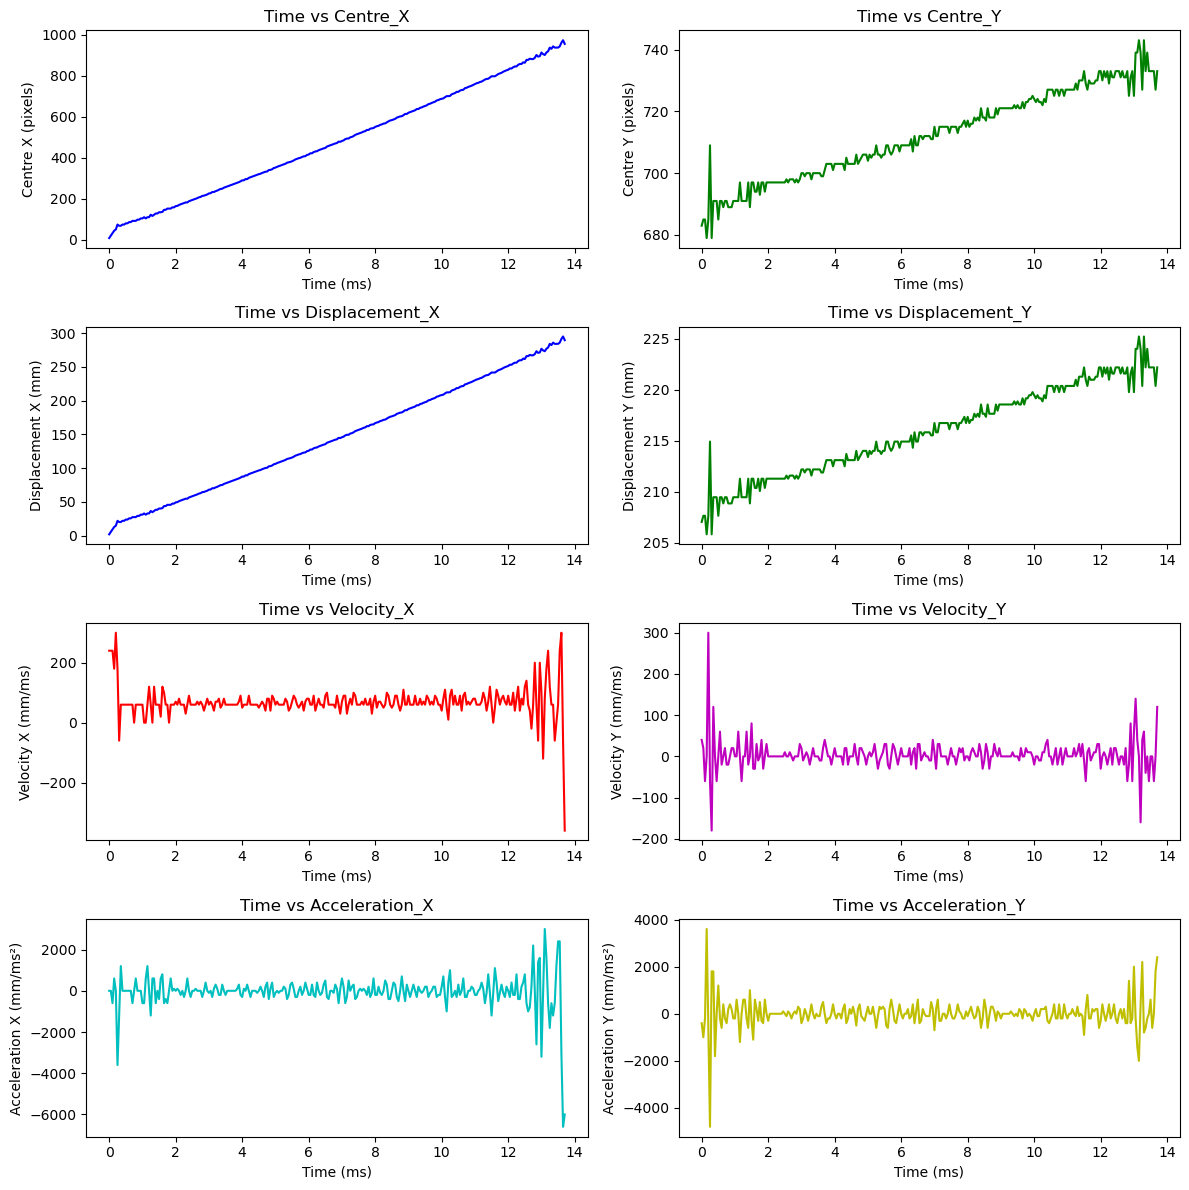

In [27]:
import matplotlib.pyplot as plt

# Define the scale factor in mm per pixel
scale_factor = 10 * 25.4 / 838  # mm/pixel

# Convert Centre_X and Centre_Y to displacement in mm
trajectory_data["Displacement_X_mm"] = trajectory_data["Centre_X"] * scale_factor
trajectory_data["Displacement_Y_mm"] = trajectory_data["Centre_Y"] * scale_factor

# Extract columns for plotting
Time_ms = trajectory_data["Time_ms"]
Centre_X = trajectory_data["Centre_X"]
Centre_Y = trajectory_data["Centre_Y"]
Displacement_X_mm = trajectory_data["Displacement_X_mm"]
Displacement_Y_mm = trajectory_data["Displacement_Y_mm"]
Velocity_X = trajectory_data["Velocity_X"]
Velocity_Y = trajectory_data["Velocity_Y"]
Acceleration_X = trajectory_data["Acceleration_X"]
Acceleration_Y = trajectory_data["Acceleration_Y"]

# Extract displacement values for plotting
Displacement_X_mm = trajectory_data["Displacement_X_mm"]
Displacement_Y_mm = trajectory_data["Displacement_Y_mm"]

# Create a figure with eight subplots (adding displacement plots)
fig, axes = plt.subplots(4, 2, figsize=(12, 12))

# Plot Time vs Centre_X
axes[0, 0].plot(Time_ms, Centre_X, 'b-')
axes[0, 0].set_title("Time vs Centre_X")
axes[0, 0].set_xlabel("Time (ms)")
axes[0, 0].set_ylabel("Centre X (pixels)")

# Plot Time vs Centre_Y
axes[0, 1].plot(Time_ms, Centre_Y, 'g-')
axes[0, 1].set_title("Time vs Centre_Y")
axes[0, 1].set_xlabel("Time (ms)")
axes[0, 1].set_ylabel("Centre Y (pixels)")

# Plot Time vs Displacement_X
axes[1, 0].plot(Time_ms, Displacement_X_mm, 'b-')
axes[1, 0].set_title("Time vs Displacement_X")
axes[1, 0].set_xlabel("Time (ms)")
axes[1, 0].set_ylabel("Displacement X (mm)")

# Plot Time vs Displacement_Y
axes[1, 1].plot(Time_ms, Displacement_Y_mm, 'g-')
axes[1, 1].set_title("Time vs Displacement_Y")
axes[1, 1].set_xlabel("Time (ms)")
axes[1, 1].set_ylabel("Displacement Y (mm)")

# Plot Time vs Velocity_X
axes[2, 0].plot(Time_ms, Velocity_X, 'r-')
axes[2, 0].set_title("Time vs Velocity_X")
axes[2, 0].set_xlabel("Time (ms)")
axes[2, 0].set_ylabel("Velocity X (mm/ms)")

# Plot Time vs Velocity_Y
axes[2, 1].plot(Time_ms, Velocity_Y, 'm-')
axes[2, 1].set_title("Time vs Velocity_Y")
axes[2, 1].set_xlabel("Time (ms)")
axes[2, 1].set_ylabel("Velocity Y (mm/ms)")

# Plot Time vs Acceleration_X
axes[3, 0].plot(Time_ms, Acceleration_X, 'c-')
axes[3, 0].set_title("Time vs Acceleration_X")
axes[3, 0].set_xlabel("Time (ms)")
axes[3, 0].set_ylabel("Acceleration X (mm/ms²)")

# Plot Time vs Acceleration_Y
axes[3, 1].plot(Time_ms, Acceleration_Y, 'y-')
axes[3, 1].set_title("Time vs Acceleration_Y")
axes[3, 1].set_xlabel("Time (ms)")
axes[3, 1].set_ylabel("Acceleration Y (mm/ms²)")

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

In [29]:
# Save the DataFrame as a CSV file
folder_path=r"H:\FST_809_FF_Sphere"
csv_file_path = os.path.join(folder_path, "realigned_circle_trajectory.csv")
trajectory_data.to_csv(csv_file_path, index=False)